In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
hr=pd.read_csv('DS2_C5_S1_Income_Data_Practice.csv')
hr2=hr

In [3]:
hr.shape

(32561, 14)

In [4]:
hr.head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Gender          32561 non-null  object
 9   Capital_Gain    32561 non-null  int64 
 10  Capital_Loss    32561 non-null  int64 
 11  Hours_Per_Week  32561 non-null  int64 
 12  Native_Country  32561 non-null  object
 13  Income_Bracket  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [6]:
hr.describe()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
hr.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [8]:
hr[['WorkClass','Education','Marital_Status','Occupation','Relationship','Gender','Native_Country','Income_Bracket']].astype('category')

,WorkClass,Education,Marital_Status,Occupation,Relationship,Gender,Native_Country,Income_Bracket
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,Male,United-States,<=50K


In [9]:
cat=['WorkClass','Education','Marital_Status','Occupation','Relationship','Gender','Native_Country','Income_Bracket']

In [10]:
for i in cat:
    hr[i]=hr[i].astype('category')
hr[cat].dtypes

WorkClass         category
Education         category
Marital_Status    category
Occupation        category
Relationship      category
Gender            category
Native_Country    category
Income_Bracket    category
dtype: object

In [11]:
label_encoder = preprocessing.LabelEncoder()
cat_n=[]
for i in cat:
    hr[str(i)+'_n']=label_encoder.fit_transform(hr[i])
    cat_n.append(str(i)+'_n')
hr[cat_n[0]].unique()

array([7, 6, 4, 1, 2, 0, 5, 8, 3])

In [12]:
hr.merge(hr[cat_n])

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,...,Native_Country,Income_Bracket,WorkClass_n,Education_n,Marital_Status_n,Occupation_n,Relationship_n,Gender_n,Native_Country_n,Income_Bracket_n
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,...,United-States,<=50K,7,9,4,1,1,1,39,0
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,...,United-States,<=50K,7,9,4,1,1,1,39,0
2,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,...,United-States,<=50K,7,9,4,1,1,1,39,0
3,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,...,United-States,<=50K,7,9,4,1,1,1,39,0
4,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,...,United-States,<=50K,7,9,4,1,1,1,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895328,81,?,120478,Assoc-voc,11,Divorced,?,Unmarried,Female,0,...,?,<=50K,0,8,0,0,4,0,0,0
1895329,45,State-gov,252208,HS-grad,9,Separated,Adm-clerical,Own-child,Female,0,...,United-States,<=50K,7,11,5,1,3,0,39,0
1895330,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,Female,0,...,United-States,<=50K,2,7,0,10,4,0,39,0
1895331,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Female,0,...,United-States,<=50K,4,12,0,8,1,0,39,0


In [13]:
hr_num=hr.select_dtypes(include=['int64','int32'])
hr_num

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week,WorkClass_n,Education_n,Marital_Status_n,Occupation_n,Relationship_n,Gender_n,Native_Country_n,Income_Bracket_n
0,39,77516,13,2174,0,40,7,9,4,1,1,1,39,0
1,50,83311,13,0,0,13,6,9,2,4,0,1,39,0
2,38,215646,9,0,0,40,4,11,0,6,1,1,39,0
3,53,234721,7,0,0,40,4,1,2,6,0,1,39,0
4,28,338409,13,0,0,40,4,9,2,10,5,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,4,7,2,13,5,0,39,0
32557,40,154374,9,0,0,40,4,11,2,7,0,1,39,1
32558,58,151910,9,0,0,40,4,11,6,1,4,0,39,0
32559,22,201490,9,0,0,20,4,11,4,1,3,1,39,0


In [14]:
num=list(hr.select_dtypes(include='int64').columns)
num

['Age',
 'Fnlwgt',
 'Education_Num',
 'Capital_Gain',
 'Capital_Loss',
 'Hours_Per_Week']

In [15]:
def featurescaling(scale):
    if scale == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    hr_scale = pd.DataFrame(scaler.fit_transform(hr_num.to_numpy()), columns = hr_num.columns)
    return hr_scale

In [16]:
scaler=MinMaxScaler()
hr_scale=featurescaling('minmax')
hr_scale

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week,WorkClass_n,Education_n,Marital_Status_n,Occupation_n,Relationship_n,Gender_n,Native_Country_n,Income_Bracket_n
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,0.875,0.600000,0.666667,0.071429,0.2,1.0,0.951220,0.0
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,0.750,0.600000,0.333333,0.285714,0.0,1.0,0.951220,0.0
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,0.500,0.733333,0.000000,0.428571,0.2,1.0,0.951220,0.0
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,0.500,0.066667,0.333333,0.428571,0.0,1.0,0.951220,0.0
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,0.500,0.600000,0.333333,0.714286,1.0,0.0,0.121951,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,0.500,0.466667,0.333333,0.928571,1.0,0.0,0.951220,0.0
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,0.500,0.733333,0.333333,0.500000,0.0,1.0,0.951220,1.0
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,0.500,0.733333,1.000000,0.071429,0.8,0.0,0.951220,0.0
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,0.500,0.733333,0.666667,0.071429,0.6,1.0,0.951220,0.0


In [17]:
hrcorr=hr_num.corr()
hrcorr.style.background_gradient(cmap='coolwarm')

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week,WorkClass_n,Education_n,Marital_Status_n,Occupation_n,Relationship_n,Gender_n,Native_Country_n,Income_Bracket_n
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.003787,-0.010508,-0.266288,-0.020947,-0.263698,0.088832,-0.001151,0.234037
Fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.016656,-0.028145,0.028153,0.001597,0.008931,0.026858,-0.051966,-0.009463
Education_Num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.052085,0.359153,-0.069304,0.109697,-0.094153,0.012280,0.050840,0.335154
Capital_Gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.033835,0.030046,-0.043393,0.025505,-0.057919,0.048480,-0.001982,0.223329
Capital_Loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.012216,0.016746,-0.034187,0.017987,-0.061062,0.045567,0.000419,0.150526
Hours_Per_Week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.138962,0.055510,-0.190519,0.080383,-0.248974,0.229309,-0.002671,0.229689
WorkClass_n,0.003787,-0.016656,0.052085,0.033835,0.012216,0.138962,1.000000,0.023513,-0.064731,0.254892,-0.090461,0.095981,-0.007690,0.051604
Education_n,-0.010508,-0.028145,0.359153,0.030046,0.016746,0.055510,0.023513,1.000000,-0.038407,-0.021260,-0.010876,-0.027356,0.064288,0.079317
Marital_Status_n,-0.266288,0.028153,-0.069304,-0.043393,-0.034187,-0.190519,-0.064731,-0.038407,1.000000,-0.009654,0.185451,-0.129314,-0.023819,-0.199307
Occupation_n,-0.020947,0.001597,0.109697,0.025505,0.017987,0.080383,0.254892,-0.021260,-0.009654,1.000000,-0.075607,0.080296,-0.012543,0.075468


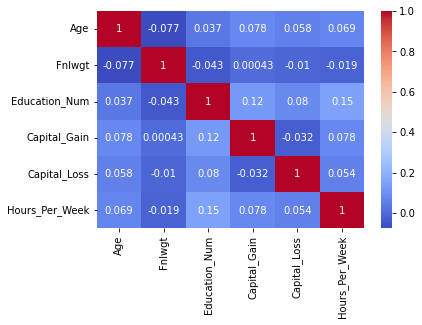

In [18]:
new_hr=hr_scale[num]
hrcorr=sns.heatmap(new_hr.corr(),annot=True,cmap='coolwarm')

In [21]:
y=hr2['Income_Bracket']
X=hr2

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 20)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22792, 22)
(9769, 22)
(22792,)
(9769,)


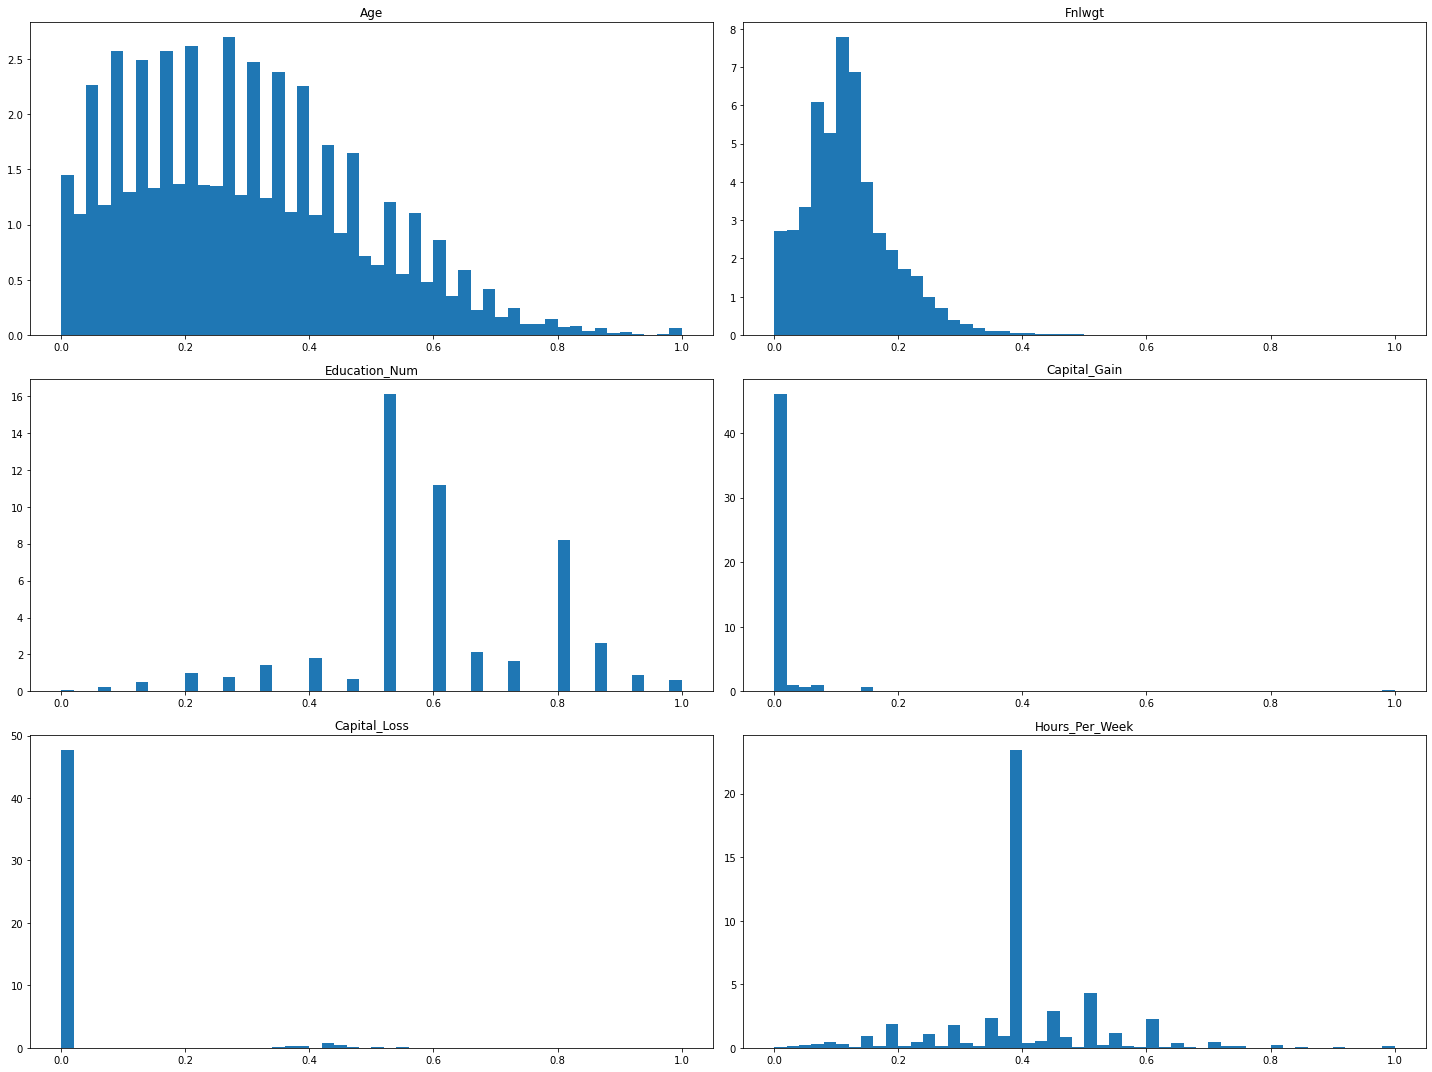

In [35]:
numeric_Col = new_hr.columns
num_cols= 4
n_bins = 50

num_rows = int(len(numeric_Col )/num_cols)+1

fig, axs = plt.subplots(3,2,tight_layout = True, figsize= (20,15))

for col, ax in zip(numeric_Col, axs.flatten()[:len(numeric_Col)]):
    ax.hist(new_hr[col], bins = n_bins, density= True)
    ax.set_title(col)
plt.show()

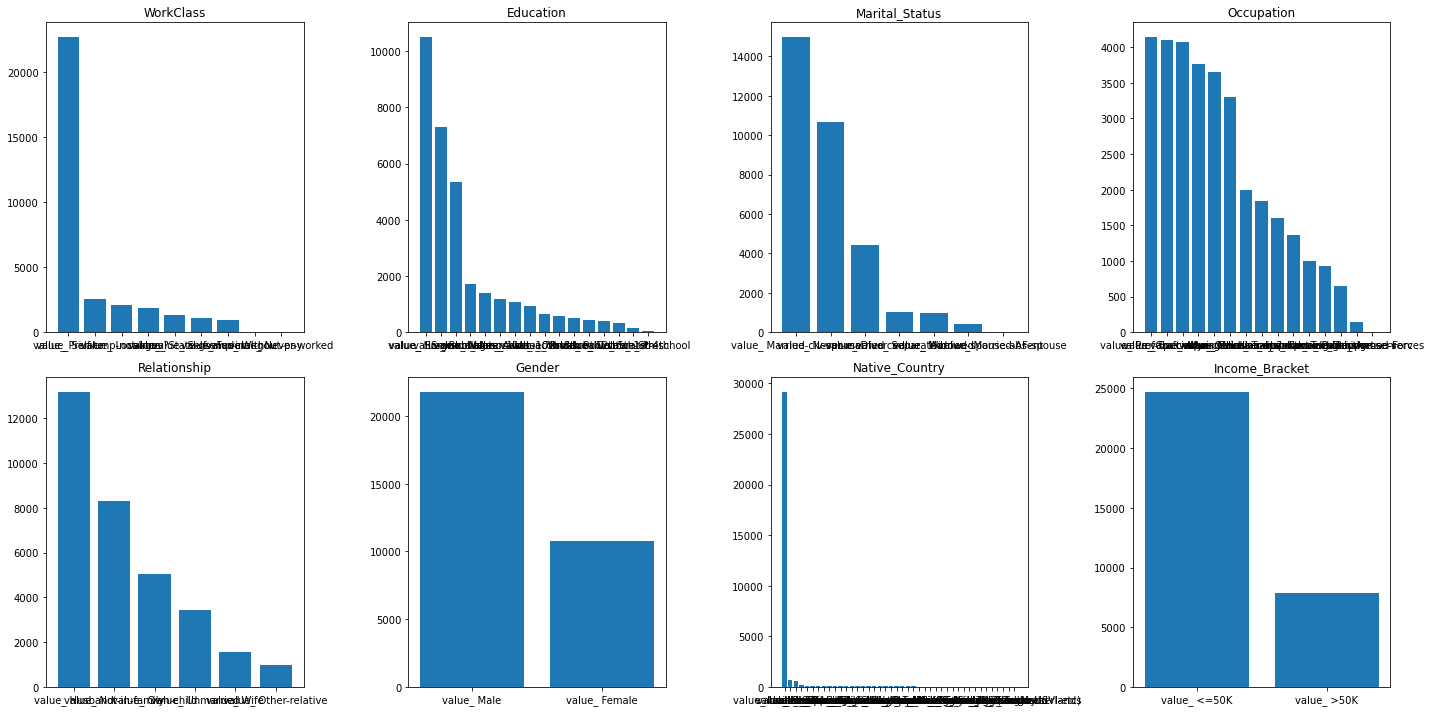

In [39]:
# Histogram of all categorical features
num_cols= 4
cat_hr = hr[cat]

num_rows = int(len(cat)/num_cols)

fig, axs = plt.subplots(num_rows, num_cols, tight_layout = True, figsize= (20,10))

for col, ax in zip(cat, axs.flatten()[:len(cat)]):
    stats = cat_hr[col].value_counts()
    values = list(stats)
    names = list(map(lambda x : ''.join(('value_', str(x))), list(stats.index)))
    ax.bar(names,values)
    ax.set_title(col)
plt.show()